<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_5/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [ ]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
2+2$\alpha$Hz = 4Hz <br>
5+5$\alpha$Hz = 10Hz <br>

Part 1:


In [ ]:
Fs = 100
f0 = 4
f1 = 10
tf = 10
n=np.arange(0, tf, (1/Fs))
def chirp_signal(t):
  ft = f0 + (f1 - f0) * t / tf
  return np.sin(2*pi*ft*t)

w = chirp_signal(n)

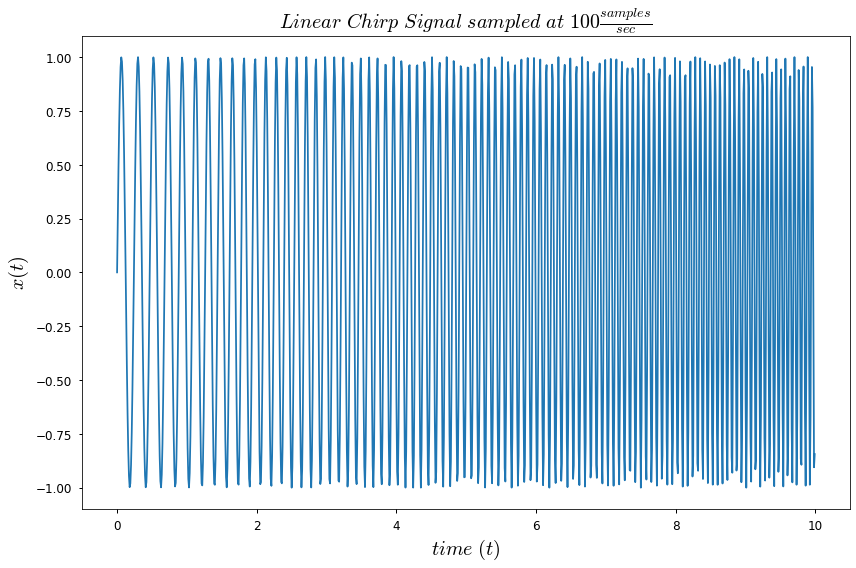

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y)
    axs.set_title(r'$Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n, w , xaxis_label=r'$time\ (t)$', yaxis_label=r'$x(t)$')
fig.savefig('fig1.png')

Part 2:

In [ ]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X
    
frequency_1, ms_1 = mag_spec(w, Fs, Fs/2)

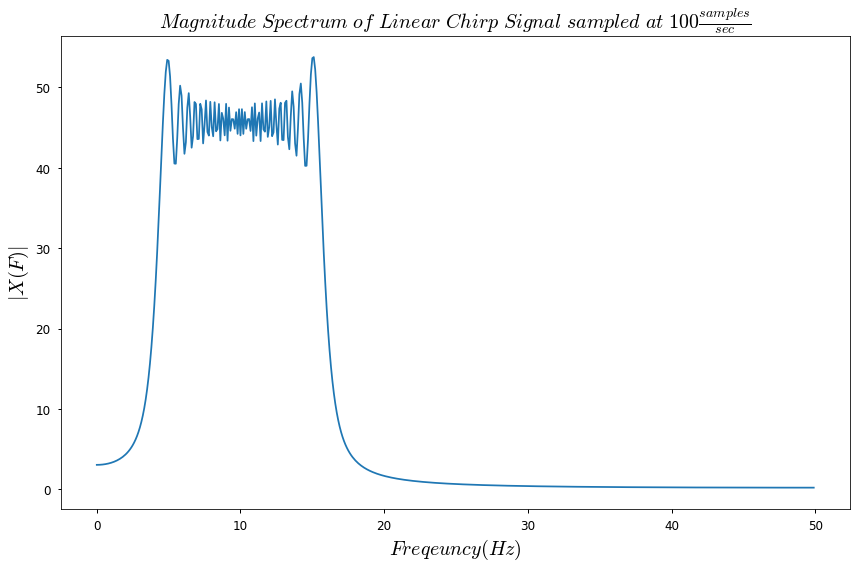

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
def plot(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(x, y)
    axs.set_title(r'$Magnitude\ Spectrum\ of\ Linear\ Chirp\ Signal\ sampled\ at\ 100\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot(frequency_1, ms_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=0)
fig.savefig('fig2.png')

Part 3:

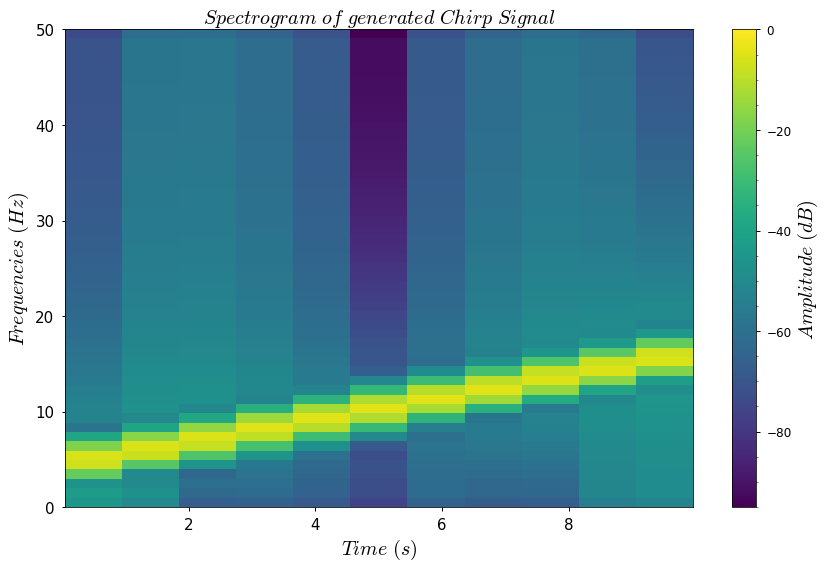

In [68]:
fs = 100
Nos = 100
def specgram2d(y, Nos, fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = ax.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig1.tight_layout()


fig1, ax1 = plt.subplots(figsize=(12,8))
specgram2d(w, Nos, fs, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal$')
fig1.savefig('fig3.png')

Spectrograms of Generated Chirp Signal for varying window lengths

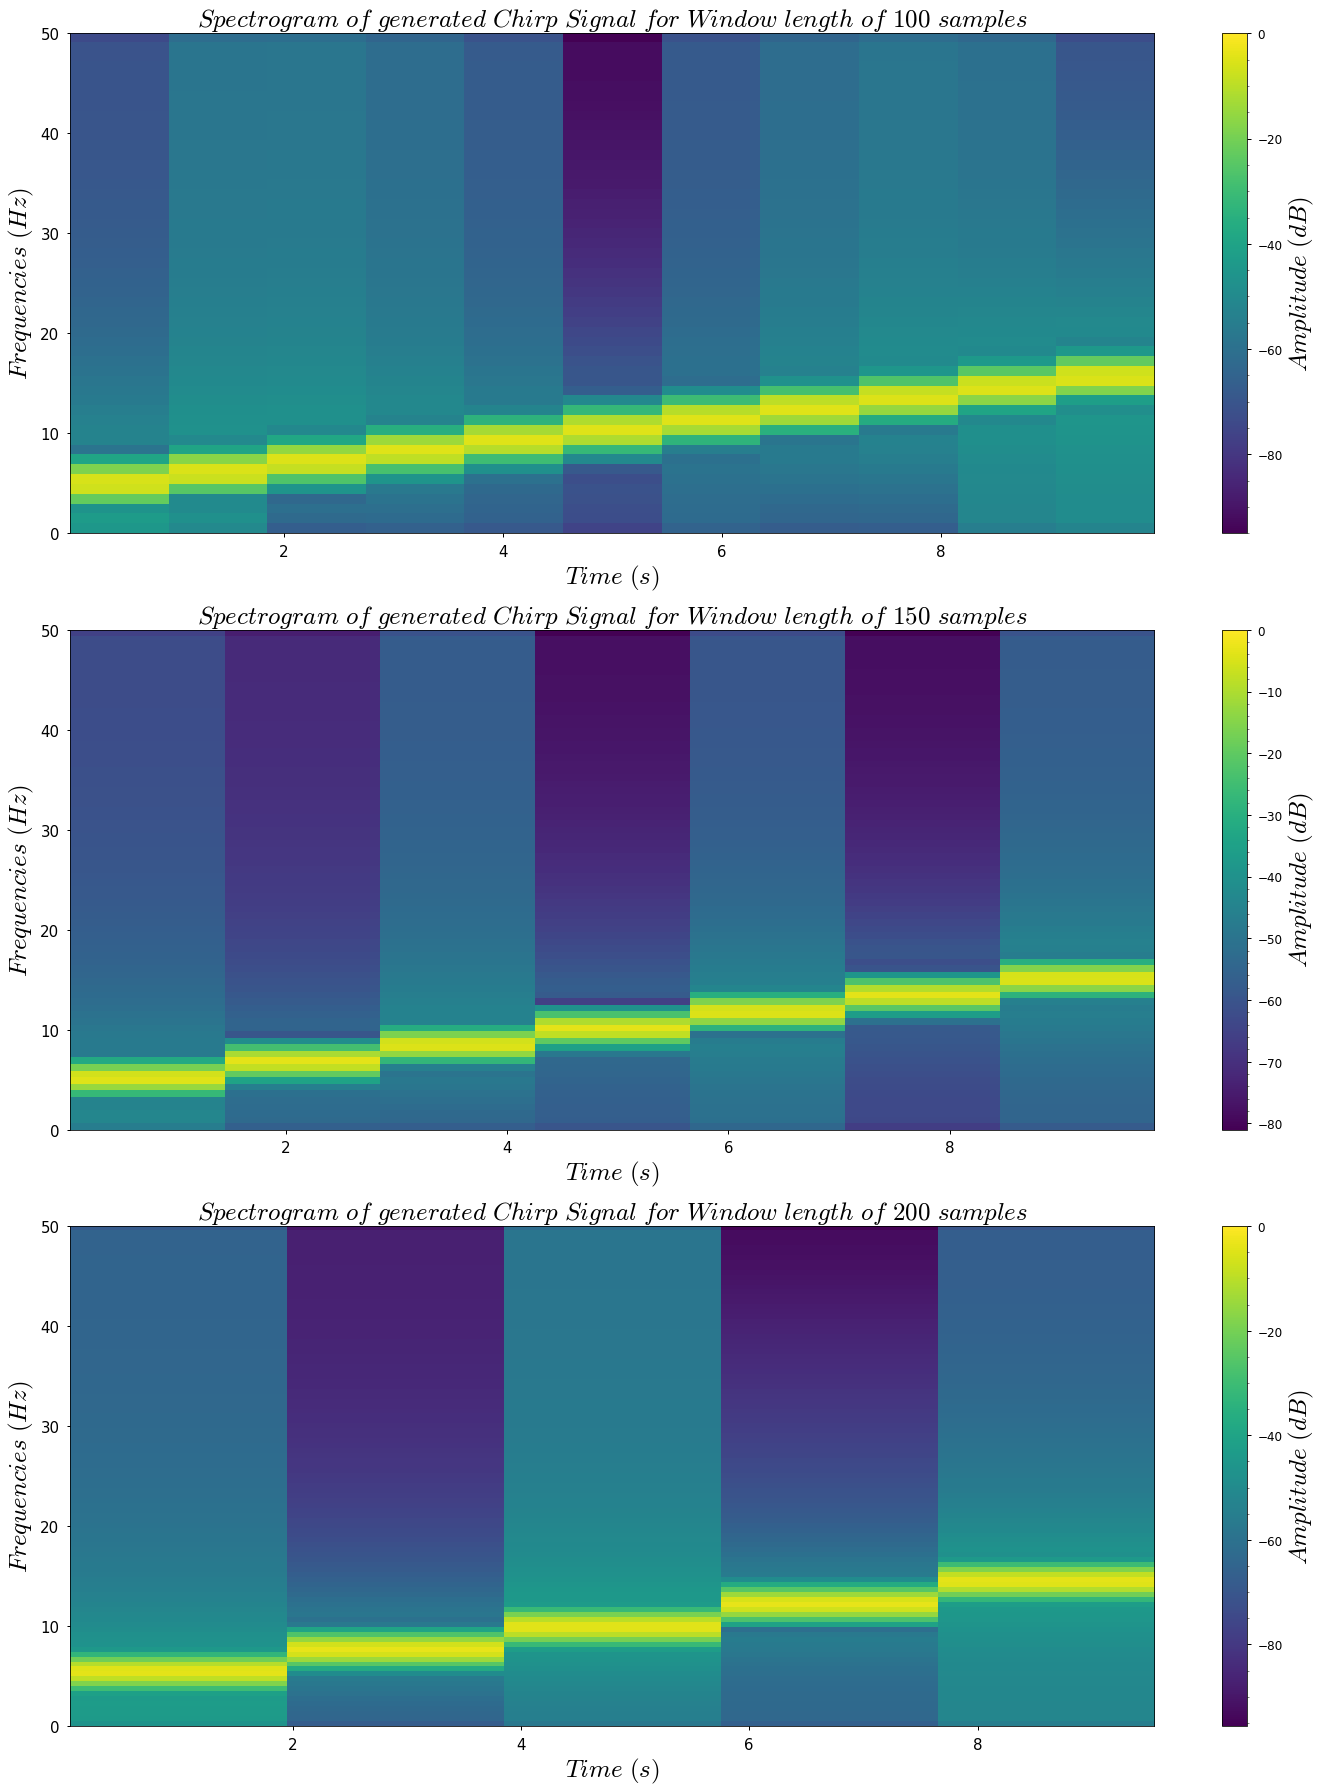

In [86]:
Nos1 = 100
Nos2 = 150
Nos3 = 200

fig2, axs = plt.subplots(3, figsize=(20,25))
def specgram2d(y, Nos, fs, window=None, row=None, title=None):
  #axs[row].plot.axes()
  axs[row].set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = axs[row].specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  axs[row].set_xlabel(r'$Time\ (s)$', fontsize = 25)
  axs[row].set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=axs[row])
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  axs[row].tick_params(axis="both", labelsize = 15)
  fig2.tight_layout()



specgram2d(w, Nos1, fs, row=0, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 100\ samples$')
specgram2d(w, Nos2, fs, row=1, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 150\ samples$')
specgram2d(w, Nos3, fs, row=2, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ for\ Window\ length\ of\ 200\ samples$')
fig2.savefig('fig4.png')

Spectrograms of Generated Chirp Signal for different windowing techniques

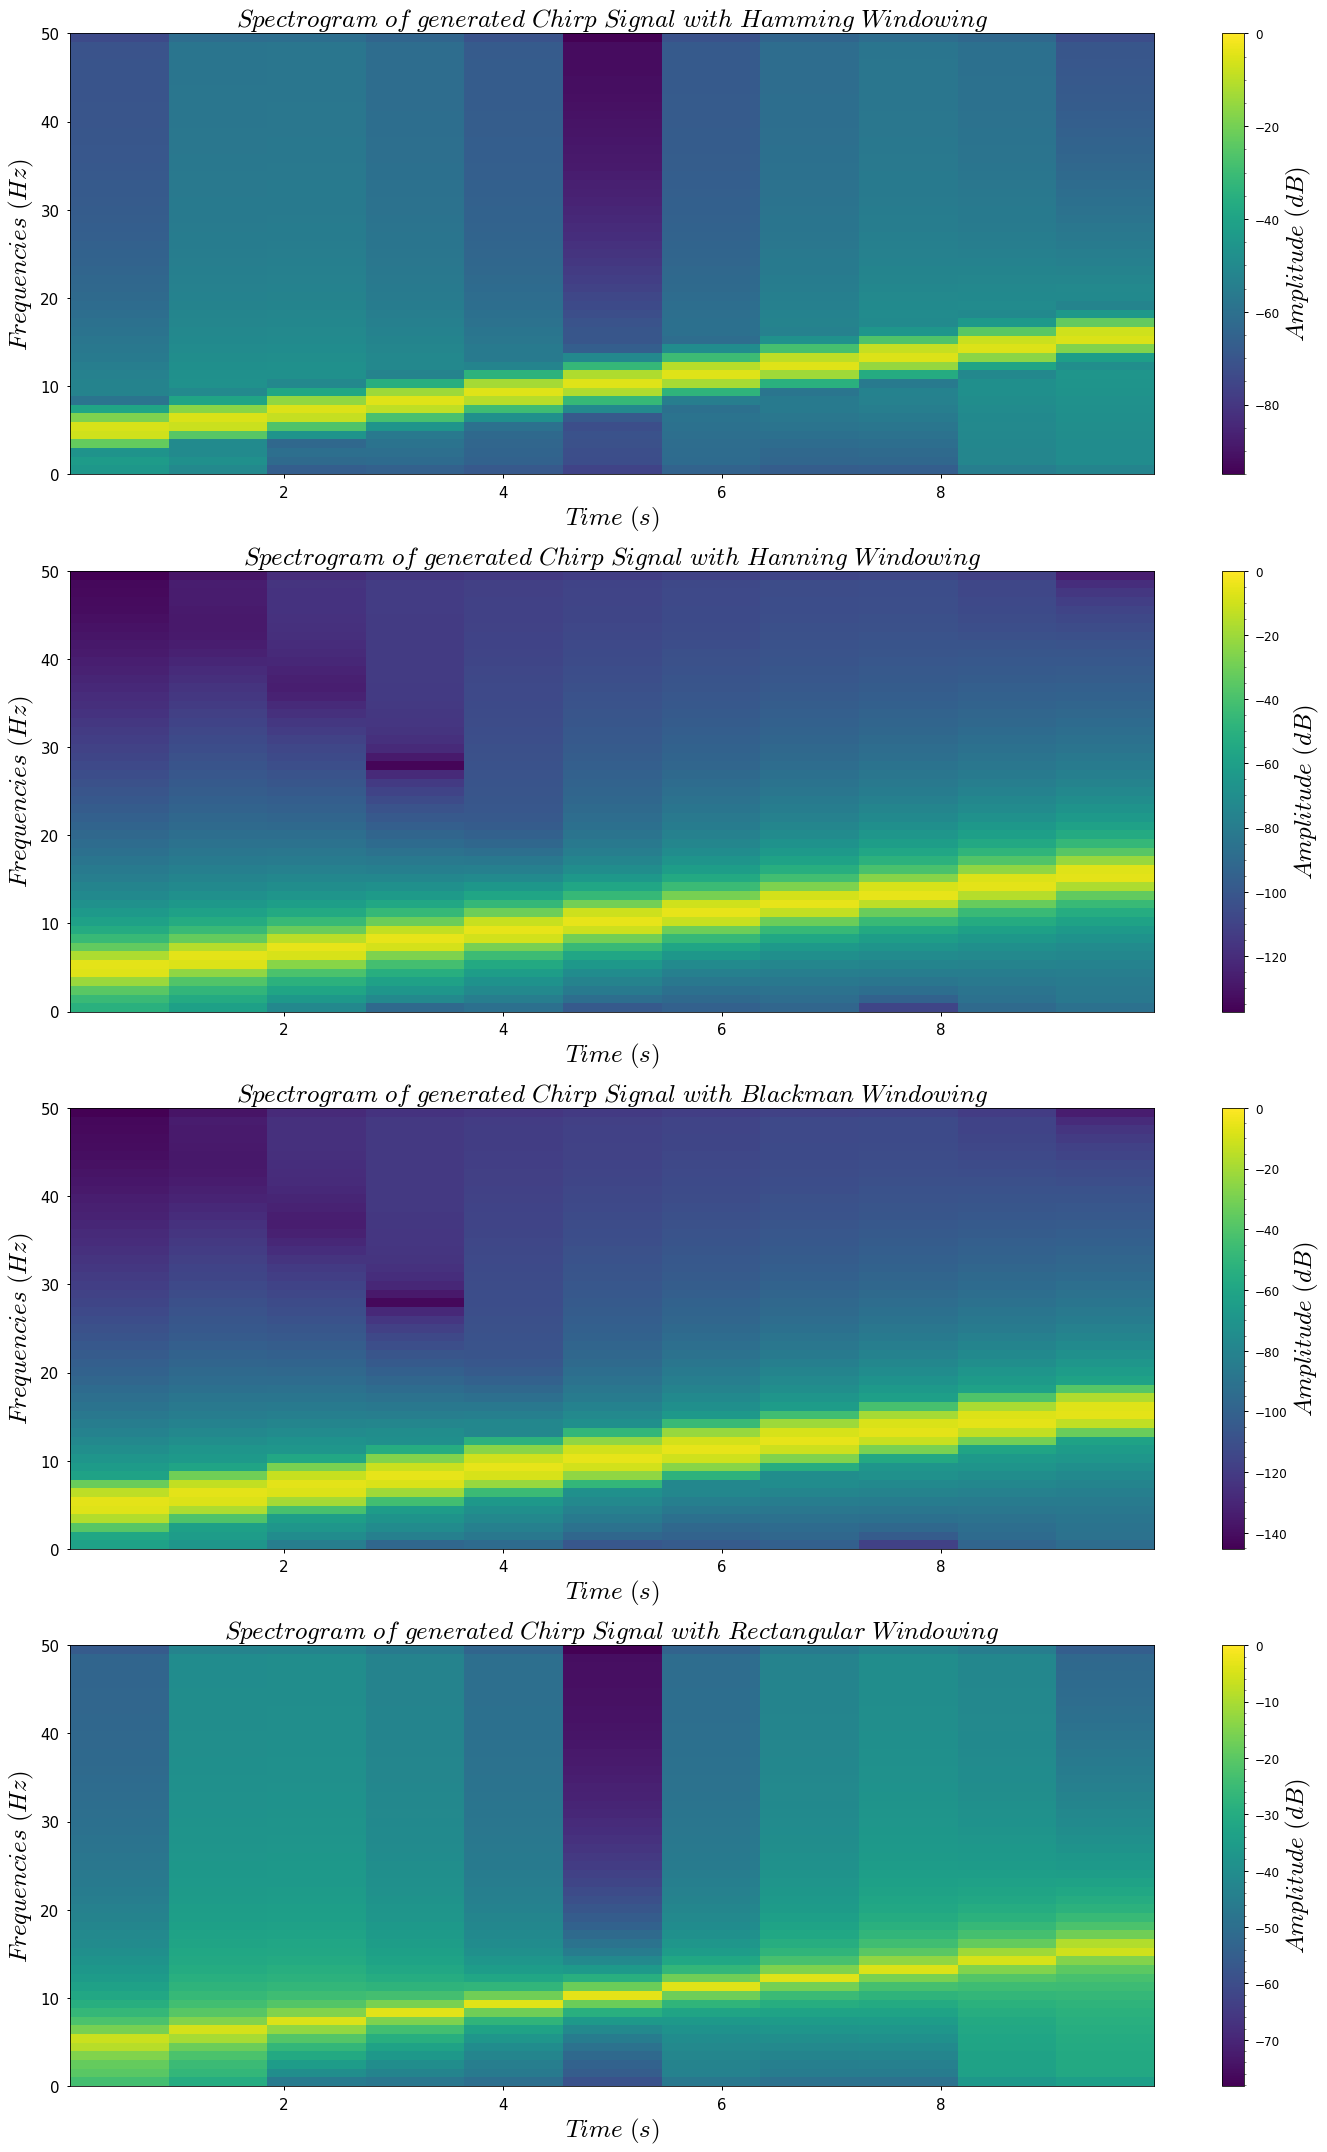

In [92]:
fig3, axs = plt.subplots(4, figsize=(20,30))
def specgram2d(y, Nos, fs, window=None, row=None, title=None):
  #axs[row].plot.axes()
  axs[row].set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hann(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = axs[row].specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  axs[row].set_xlabel(r'$Time\ (s)$', fontsize = 25)
  axs[row].set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=axs[row])
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  axs[row].tick_params(axis="both", labelsize = 15)
  fig3.tight_layout()

specgram2d(w, Nos, fs, row=0, window='hamming', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Hamming\ Windowing$')
specgram2d(w, Nos, fs, row=1, window='hanning', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Hanning\ Windowing$')
specgram2d(w, Nos, fs, row=2, window='blackman', title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Blackman\ Windowing$')
specgram2d(w, Nos, fs, row=3, window=None, title = r'$Spectrogram\ of\ generated\ Chirp\ Signal\ with\ Rectangular\ Windowing$')
fig3.savefig('fig5.png')

# **Problem** **2**. <br>
Part 1:

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


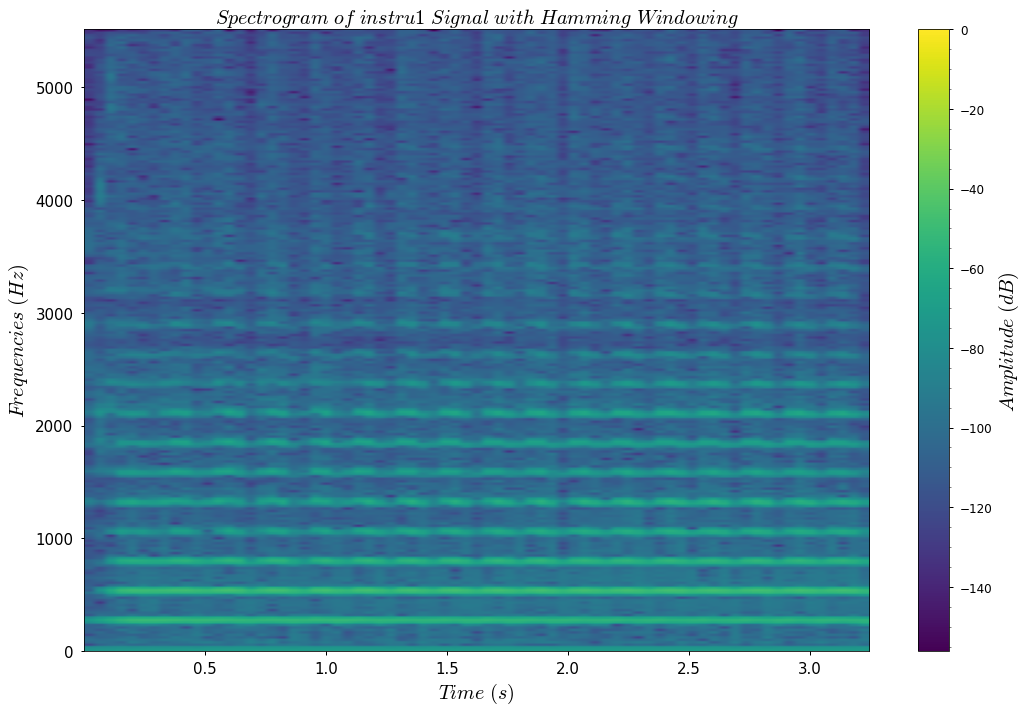

In [116]:
Fs1, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs1))
print('Size of instrument signal: {}'.format(track.shape))
Nosi = 500
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=10, scale='dB', vmax=0)
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()


fig4, ax1 = plt.subplots(figsize=(15,10))
specgram2d(track, Nosi, Fs1, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing$')
fig4.savefig('fig6.png')


display(Audio(data=track, rate=Fs1))

Part 2:

Sampling rate of instrument : 44100Hz
Size of instrument signal: (220500,)


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


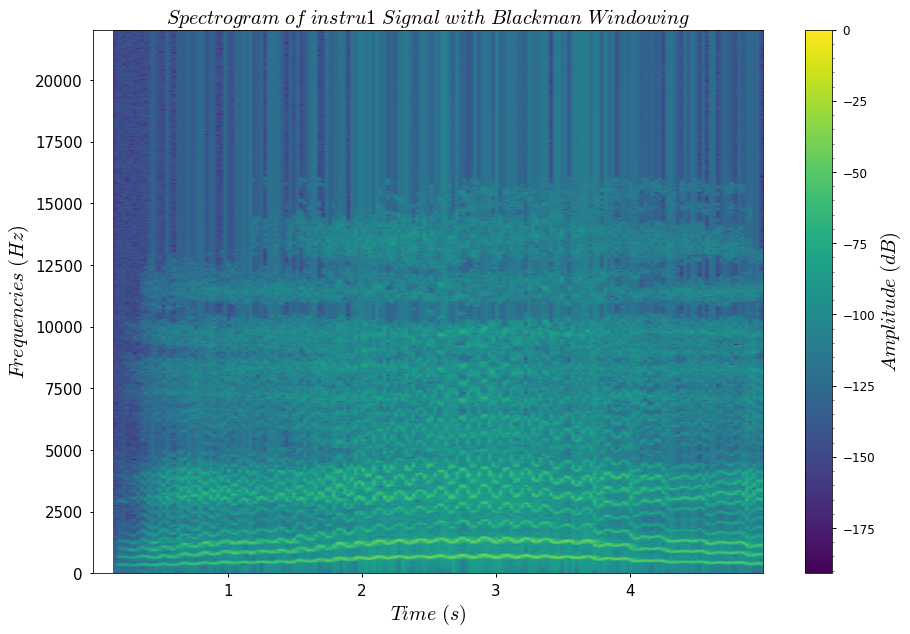

In [119]:
Fs2, opera= wavfile.read('Opera.wav')
opera = opera/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs2))
print('Size of instrument signal: {}'.format(opera.shape))

Noso = 1200
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 20)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=10, scale='dB', vmax=0)
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 20)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 20)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 20)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()


fig5, ax1 = plt.subplots(figsize=(15,10))
specgram2d(opera, Noso, Fs2, ax=ax1, window='blackman', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Blackman\ Windowing$')
fig5.savefig('fig7.png')


display(Audio(data=opera, rate=Fs2))

# **Problem** **3**. <br>

In [120]:
!pip install ffmpeg-python

In [121]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [122]:
audio, sr = get_audio()

In [130]:
wavfile.write('recording.wav', sr, audio)